# Hydrogen radial wavefunction via numerov and from sympy

In [ ]:
from typing import Any

import matplotlib.pyplot as plt
import numpy as np

from rydstate.radial import RadialKet

In [ ]:
state = RadialKet("H_textbook", nu=10, l_r=5)
state.set_n_for_sanity_check(10)
state.create_model()
state.create_grid(dz=1e-2)
state.create_wavefunction(sign_convention="n_l_1")  # do the numerov integration
grid, wavefunction = state.grid, state.wavefunction

In [3]:
from sympy.abc import r as sympy_r
from sympy.physics import hydrogen as sympy_hydrogen
from sympy.utilities.lambdify import lambdify


def calc_r_list(nu: float, l: int, x_list: np.typing.NDArray[Any]) -> np.typing.NDArray[Any]:
    if nu <= 35 or False:
        r_nl = lambdify(sympy_r, sympy_hydrogen.R_nl(nu, l, sympy_r, Z=1))
        r_list = r_nl(x_list)
    else:  # some weird sympy bug if trying to use lambdify R_nl for nu > 35
        r_list = np.zeros_like(x_list)
        for i, x in enumerate(x_list):
            r_list[i] = sympy_hydrogen.R_nl(nu, l, x, Z=1)
    return r_list


sympy_r_list = calc_r_list(state.nu, state.l_r, grid.x_list)
sympy_u_list = sympy_r_list * grid.x_list
sympy_w_list = sympy_u_list / np.sqrt(grid.z_list)

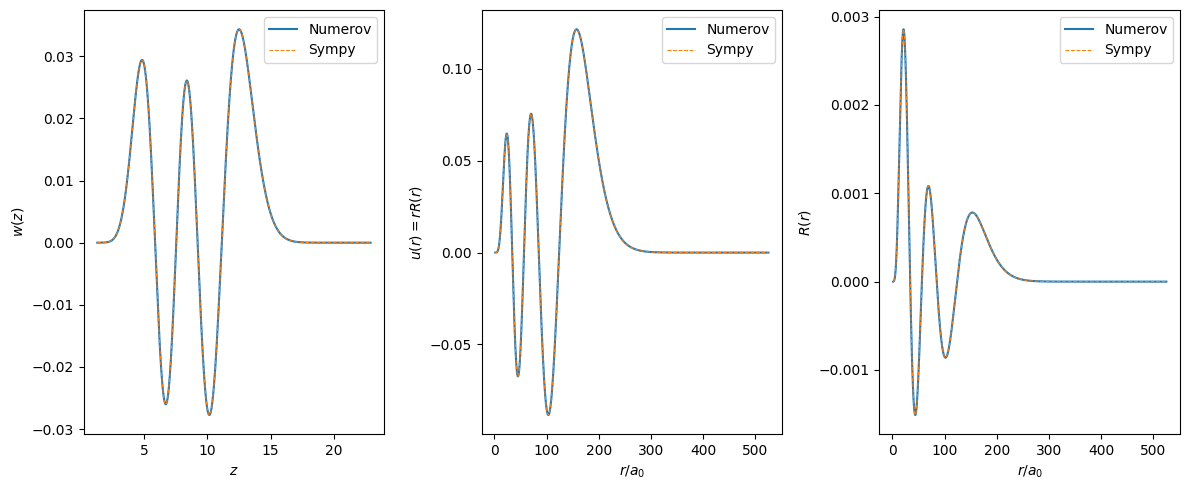

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].plot(grid.z_list, wavefunction.w_list, "C0-", label="Numerov")
axs[0].plot(grid.z_list, sympy_w_list, "C1--", lw=0.75, label="Sympy")
axs[0].set_xlabel(r"$z$")
axs[0].set_ylabel(r"$w(z)$")
axs[0].legend()

axs[1].plot(grid.x_list, wavefunction.u_list, "C0-", label="Numerov")
axs[1].plot(grid.x_list, sympy_u_list, "C1--", lw=0.75, label="Sympy")
axs[1].set_xlabel(r"$r / a_0$")
axs[1].set_ylabel(r"$u(r) = r R(r)$")
axs[1].legend()

axs[2].plot(grid.x_list, wavefunction.r_list, "C0-", label="Numerov")
axs[2].plot(grid.x_list, sympy_r_list, "C1--", lw=0.75, label="Sympy")
axs[2].set_xlabel(r"$r / a_0$")
axs[2].set_ylabel(r"$R(r)$")
axs[2].legend()

fig.tight_layout()
plt.show()